<a href="https://colab.research.google.com/github/aryanycce/aryanDL/blob/main/PRAC_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
np.random.seed(0)
n_samples = 30
true_function=lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1

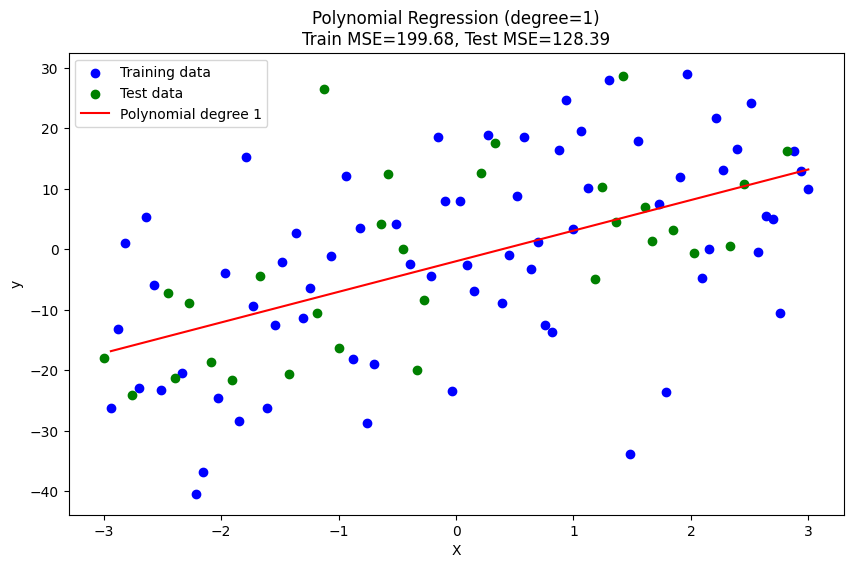

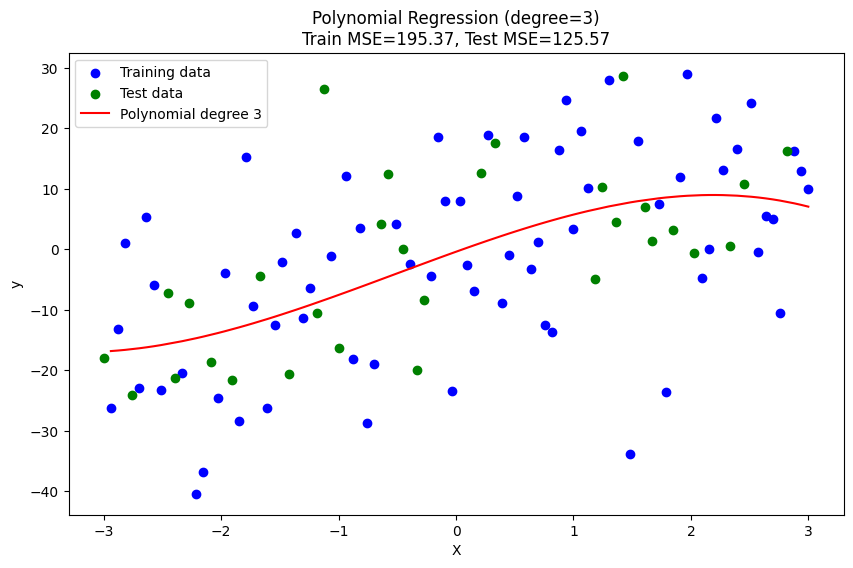

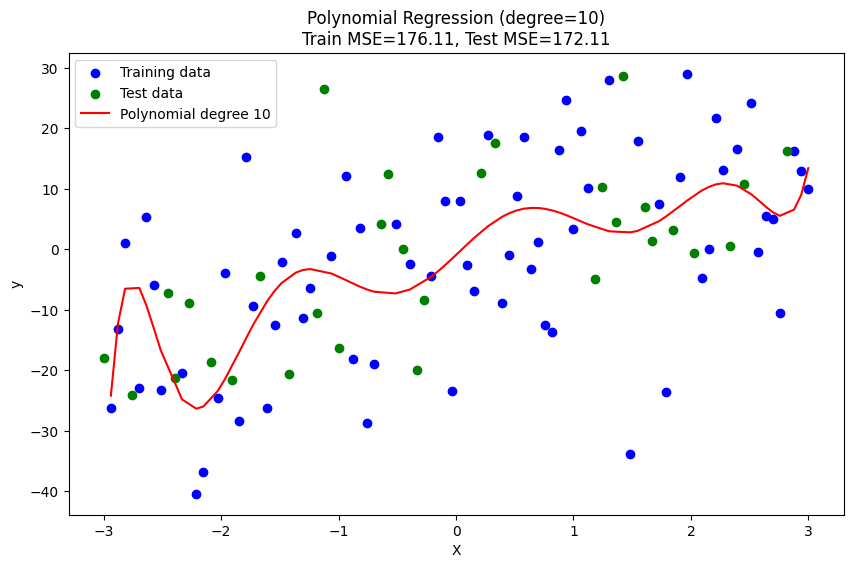

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Generate synthetic dataset with a polynomial relationship
def generate_data(n_samples=100, noise=10, random_seed=42):
    np.random.seed(random_seed)
    X = np.linspace(-3, 3, n_samples)
    # True relationship (cubic)
    y_true = 0.5 * X**3 - X**2 + 2 * X + 3
    # Add noise
    y = y_true + np.random.normal(0, noise, n_samples)
    return X.reshape(-1, 1), y

# 2. Fit polynomial regression of given degree and return predictions and errors
def fit_polynomial_regression(X_train, y_train, X_test, y_test, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return y_train_pred, y_test_pred, train_error, test_error

# 3. Plot results to visualize overfitting/underfitting
def plot_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, degree, train_error, test_error):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(np.sort(X_train.flatten()), y_train_pred[np.argsort(X_train.flatten())], color='red', label=f'Polynomial degree {degree}')
    plt.title(f'Polynomial Regression (degree={degree})\nTrain MSE={train_error:.2f}, Test MSE={test_error:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def main():
    # Generate data
    X, y = generate_data(n_samples=100, noise=15)
    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    degrees = [1, 3, 10]  # 1 = underfitting, 3 = good fit (true underlying model), 10 = overfitting

    for degree in degrees:
        y_train_pred, y_test_pred, train_error, test_error = fit_polynomial_regression(X_train, y_train, X_test, y_test, degree)
        plot_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, degree, train_error, test_error)

if __name__ == "__main__":
    main()
